In [ ]:
Notebook made to Create the FSM using Linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,3108,4,3.0,890.0,6.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,3502,1,0.0,890.0,1.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,3526,2,2.0,890.0,5.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#setting our dependent and independent variables
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
#splitting our data once to get out train and hold out set
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [6]:
#splitting once more to get the training and validation set
X_t,X_val,y_t,y_val=train_test_split(X_train,y_train,train_size=.8,random_state=2020)

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_t,y_t)

LinearRegression()

In [11]:
lr.score(X_t,y_t)

0.38318830533684145

In [12]:
lr.score(X_val,y_val)

0.39133843040442984

First simple model is completed and it is performing fairly well, let see how it performs with scaled data.

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [14]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [15]:
#fitting our standard scalar
X_t_ss=ss_x.fit_transform(X_t)
X_val_ss=ss_x.transform(X_val)

In [16]:
#fitting out minmax scalar the less complex of the two scalars
X_t_mm=mm_x.fit_transform(X_t)
X_val_mm=mm_x.transform(X_val)

In [17]:
lr2=LinearRegression()

In [18]:
lr2.fit(X_t_ss,y_t)

LinearRegression()

In [19]:
lr2.score(X_t_ss,y_t)

0.38317168904748033

In [20]:
lr2.score(X_val_ss,y_val)

0.3913806247194861

The model is performing very simialr to the FSM so scaling does not seem to affect this model to much.

In [21]:
lr3=LinearRegression()

In [22]:
lr3.fit(X_t_mm,y_t)

LinearRegression()

In [23]:
lr3.score(X_t_mm,y_t)

0.38318830718782526

In [32]:
lr3.score(X_val_mm,y_val)

0.39133851504939143

This model is performing similar to the standard scalar model. These models seem to explain about 40% of the vairance within the data.

In [33]:
from sklearn.model_selection import GridSearchCV

In [31]:
model = lr2
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_t, y_t)
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_val) - y_val) ** 2))

r2 / variance :  0.3825454643480582
Residual sum of squares: 5289628398.15


Trying OLS Linear regression it has more atrributes to look at for a deeper dive potentially.

In [123]:
df=pd.read_csv("Imputed.csv")

In [124]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,3108,4,3.0,890.0,6.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,3502,1,0.0,890.0,1.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,3526,2,2.0,890.0,5.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
fsm_ols=df

In [127]:
pd.set_option('display.max_columns', None)


In [128]:
fsm_ols

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,ACR_<2.0>,ACR_<3.0>,BUS_<1.0>,BUS_<2.0>,BUS_<9.0>,FS_<1.0>,FS_<2.0>,TOIL_<1.0>,TOIL_<2.0>,TOIL_<9.0>,VEH_<0.0>,VEH_<1.0>,VEH_<2.0>,VEH_<3.0>,VEH_<4.0>,VEH_<5.0>,VEH_<6.0>,YBL_<1.0>,YBL_<2.0>,YBL_<3.0>,YBL_<4.0>,YBL_<5.0>,YBL_<6.0>,YBL_<7.0>,YBL_<8.0>,YBL_<9.0>,YBL_<10.0>,YBL_<11.0>,YBL_<12.0>,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,3108,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,3502,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,3526,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
fsm_ols.columns

Index(['HINCP_x', 'SMOCP', 'PUMA', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP',
       'TAXAMT', 'ACR_<1.0>', 'ACR_<2.0>', 'ACR_<3.0>', 'BUS_<1.0>',
       'BUS_<2.0>', 'BUS_<9.0>', 'FS_<1.0>', 'FS_<2.0>', 'TOIL_<1.0>',
       'TOIL_<2.0>', 'TOIL_<9.0>', 'VEH_<0.0>', 'VEH_<1.0>', 'VEH_<2.0>',
       'VEH_<3.0>', 'VEH_<4.0>', 'VEH_<5.0>', 'VEH_<6.0>', 'YBL_<1.0>',
       'YBL_<2.0>', 'YBL_<3.0>', 'YBL_<4.0>', 'YBL_<5.0>', 'YBL_<6.0>',
       'YBL_<7.0>', 'YBL_<8.0>', 'YBL_<9.0>', 'YBL_<10.0>', 'YBL_<11.0>',
       'YBL_<12.0>', 'YBL_<13.0>', 'YBL_<14.0>', 'YBL_<15.0>', 'YBL_<16.0>',
       'YBL_<17.0>', 'YBL_<18.0>', 'YBL_<19.0>', 'YBL_<20.0>', 'YBL_<21.0>',
       'YBL_<22.0>'],
      dtype='object')

In [156]:
formula="HINCP_x ~ SMOCP + PUMA + NP + BDSP + INSP + RMSP + VALP+ TAXAMT"

In [ ]:
#+ ACR_<1.0>+ ACR_<2.0> + ACR_<3.0> + BUS_<1.0> + BUS_<2.0> + BUS_<9.0> + FS_<1.0> + FS_<2.0> + TOIL_<1.0> + TOIL_<2.0> + TOIL_<9.0> + VEH_<0.0> + VEH_<1.0> + VEH_<2.0> + VEH_<3.0> + VEH_<4.0> + VEH_<5.0>+ VEH_<6.0> + YBL_<1.0> + YBL_<2.0> + YBL_<3.0> + YBL_<4.0> + YBL_<5.0> + YBL_<6.0> + YBL_<7.0> + YBL_<8.0> + YBL_<9.0> + YBL_<10.0> + YBL_<11.0> + YBL_<12.0> + YBL_<13.0> + YBL_<14.0> + YBL_<15.0> + YBL_<16.0> + YBL_<17.0> + YBL_<18.0> + YBL_<19.0> + YBL_<20.0> + YBL_<21.0> + YBL_<22.0>

In [157]:
fsm=ols(formula=formula,data=fsm_ols).fit()

In [158]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HINCP_x   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:12:36   Log-Likelihood:            -3.1171e+06
No. Observations:              246502   AIC:                         6.234e+06
Df Residuals:                  246493   BIC:                         6.234e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.427e+04    583.274    -41.607      0.000   -2.54e+04   -2.31e+04
SMOCP         22.9238      0.263     87.162      0.000      22.408      23.439
PUMA          -0.8571      0.144     -5.952      0.000      -1.139      -0.575
NP          6289.3244    119.340     52.701      0.000    6055.422    6523.227
BDSP        2294.1805    225.622     10.168      0.000    1851.967    2736.395
INSP           1.8294      0.271      6.748      0.000       1.298       2.361
RMSP        4519.5460    100.274     45.072      0.000    4323.012    4716.080
VALP           0.0732      0.001     84.211      0.000       0.071       0.075
TAXAMT         4.0554      0.075     54.426      0.000       3.909       4.201
==============================================================================
Omnibus:                   177695.077   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5795760.500
Skew:                           3.102   Prob(JB):                         0.00
Kurtosis:                      25.930   Cond. No.                     1.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Time for Assumptions check

Linearity

In [159]:
from statsmodels.stats.diagnostic import linear_rainbow,het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statisic, rainbow_p_value=linear_rainbow(fsm)
print("Rainbow Statistic:",rainbow_statisic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow Statistic: 1.0192281965960717
Rainbow p-value: 0.0004142403457628813


Normality

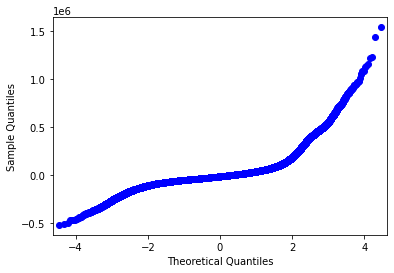

In [160]:
fsm_resids=fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids);

Homoscadaacity

In [161]:
y_hat=fsm.predict()


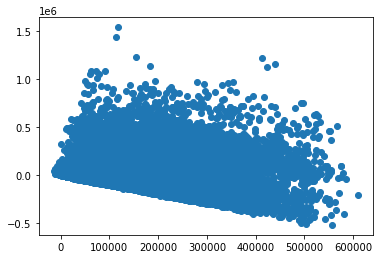

In [162]:
plt.scatter(y_hat,fsm_resids);

In [149]:
lm, lm_p_value, fvalue,f_p_value=het_breuschpagan(fsm_resids,fsm_ols[["TAXAMT"]])
print("Lagrange Multipler p-value:", lm_p_value)
print("F-Statistic p-value:",f_p_value)

Lagrange Multipler p-value: nan
F-Statistic p-value: 0.0
